# Part 1 - Data Ingestion, EDA, Wrangling

The data:

* properties_2017.csv is a sample of all properties from 2017 listed on Zillow through Sept
* train_2017.csv contains dates, propertyids, and logerror for each transaction in 2017 through Sept
* The same files are available for 2016 (entire year)
* Not all properties have transactions
* logerror=log(Zestimate)−log(SalePrice)


In [3]:
import csv
import pandas as pd
import numpy as np

### Ingest Data

First import the properties file for 2017

In [131]:
df = pd.read_csv('properties_2017.csv', low_memory=False)
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


Then import the transaction data

In [130]:
df_transactions = pd.read_csv('train_2017.csv', low_memory=False)
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


Next match the two data sets on ParcelID, using a left join

In [132]:
df_merged = pd.merge(df, df_transactions, on='parcelid', how='right')
df_merged.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
1,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017-07-26
2,17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,...,193413.0,286606.0,2016.0,93193.0,2987.36,NaN,NaN,6.111001e+13,0.071886,2017-07-28
3,17073952,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,...,90357.0,258888.0,2016.0,168531.0,2706.24,NaN,NaN,6.111002e+13,0.305680,2017-06-02
4,17078502,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,148752.0,592930.0,2016.0,444178.0,6220.70,NaN,NaN,6.111002e+13,-0.073787,2017-07-07


In [ ]:
df_merged.reset_index()

### Check NAs and Data Types

In [ ]:
df_merged.dtypes

In [ ]:
df_merged.isnull().any()

Almost all columns have NAs, so look at how many data points each column has

In [ ]:
df_merged.count()

Calculate the percent missing data

In [24]:
missing_percents = (len(df_merged.index) - df_merged.count())/len(df_merged.index)

In [25]:
missing_percents = missing_percents.sort_values()

In [125]:
import matplotlib.pyplot as plt

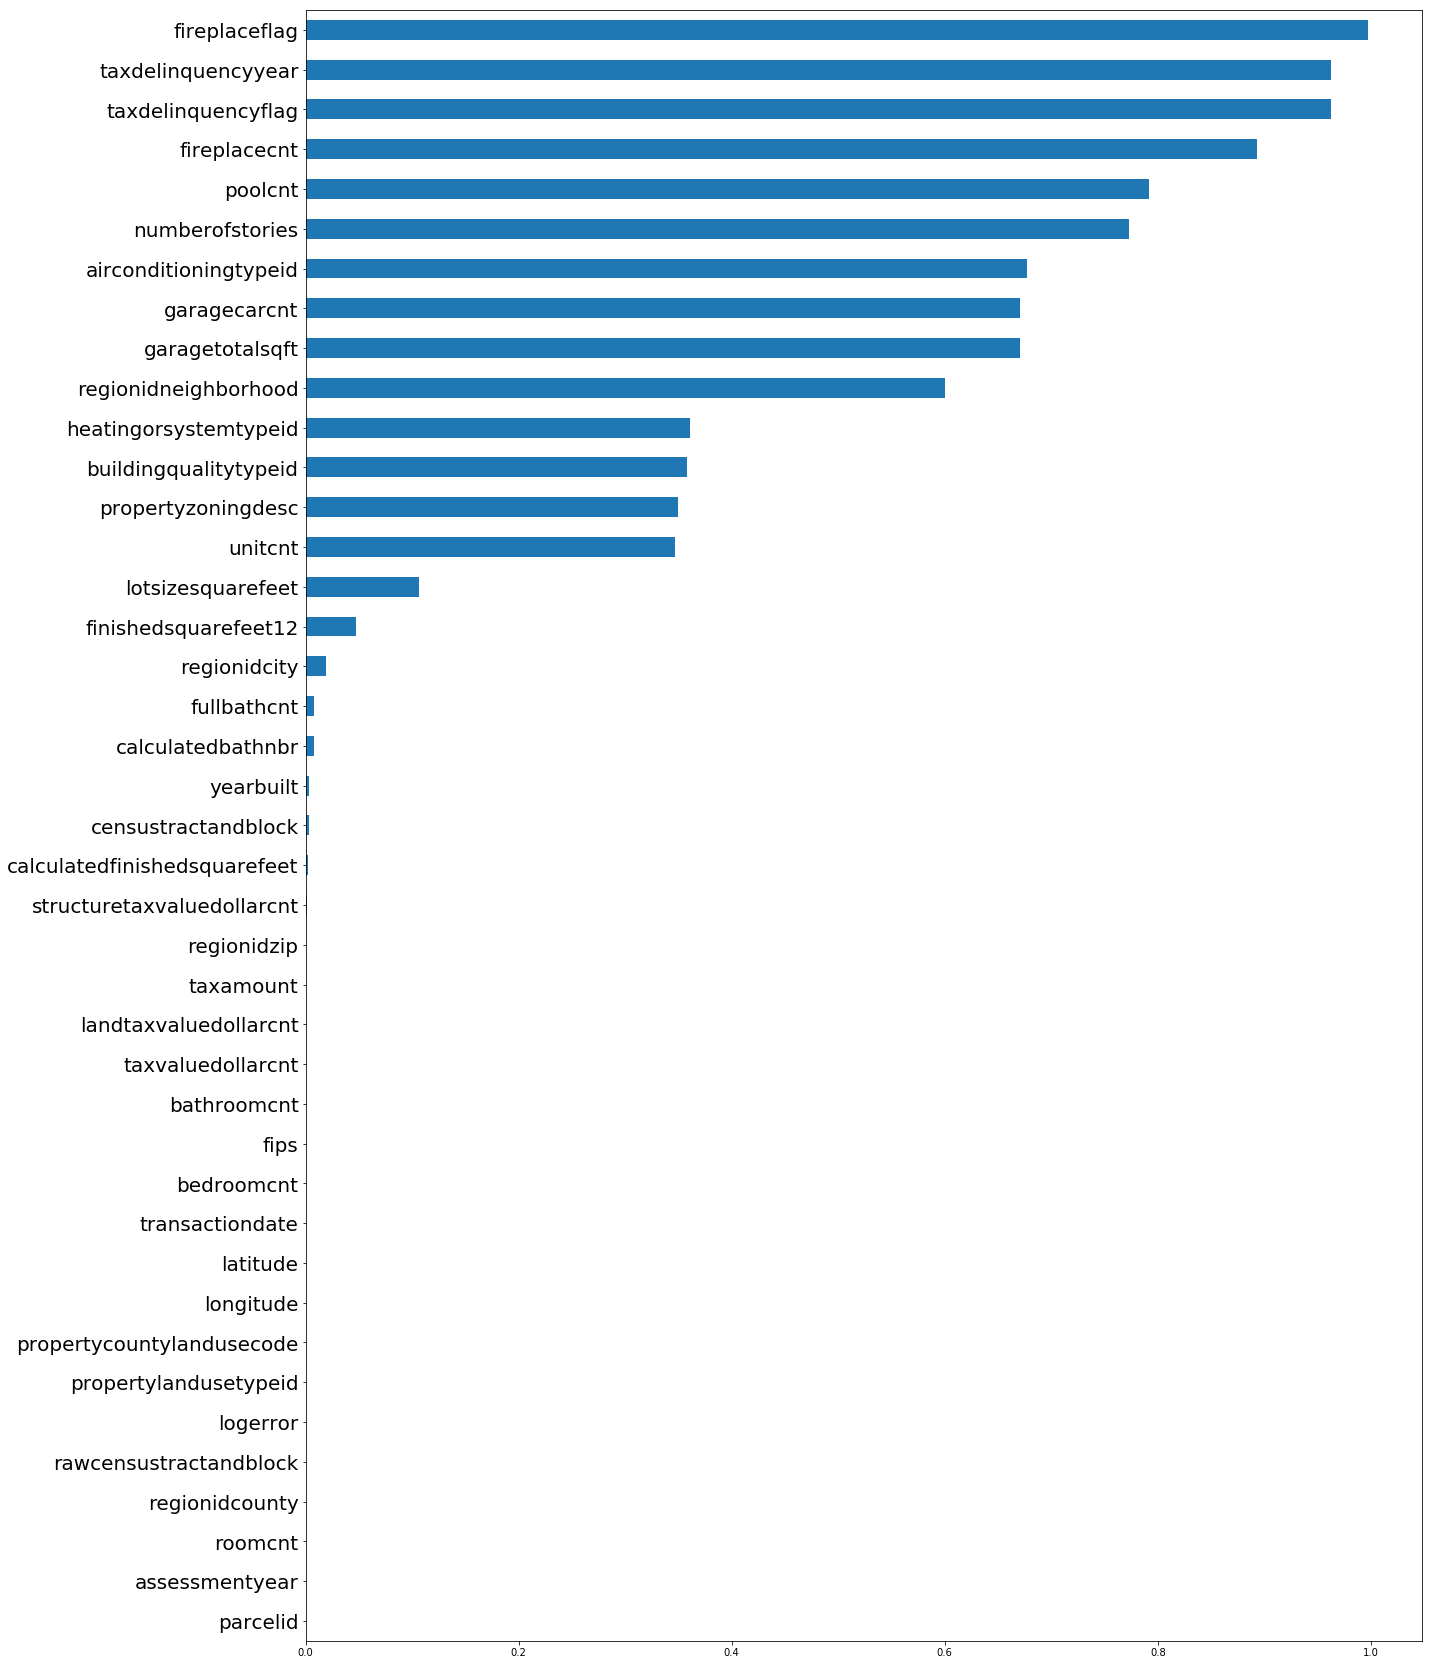

In [27]:
missing_percents.plot(kind='barh', figsize=(20,30))
plt.yticks(size=20)
plt.show()

In [28]:
missing_percents

parcelid                        0.000000
assessmentyear                  0.000000
roomcnt                         0.000000
regionidcounty                  0.000000
rawcensustractandblock          0.000000
logerror                        0.000000
propertylandusetypeid           0.000000
propertycountylandusecode       0.000000
longitude                       0.000000
latitude                        0.000000
transactiondate                 0.000000
bedroomcnt                      0.000000
fips                            0.000000
bathroomcnt                     0.000000
taxvaluedollarcnt               0.000013
landtaxvaluedollarcnt           0.000026
taxamount                       0.000064
regionidzip                     0.000645
structuretaxvaluedollarcnt      0.001482
calculatedfinishedsquarefeet    0.002591
censustractandblock             0.003184
yearbuilt                       0.003480
calculatedbathnbr               0.007940
fullbathcnt                     0.007940
regionidcity    

A few of the columns with >80% missing data we will examine more closely to determine if they can be calculated, but for the rest we are dropping them

In [116]:
df_merged.drop('architecturalstyletypeid', axis=1, inplace=True)
df_merged.drop('basementsqft', axis=1, inplace=True)
df_merged.drop('buildingclasstypeid', axis=1, inplace=True)
df_merged.drop('decktypeid', axis=1, inplace=True)
df_merged.drop('finishedfloor1squarefeet', axis=1, inplace=True)
df_merged.drop('finishedsquarefeet13', axis=1, inplace=True)
df_merged.drop('finishedsquarefeet15', axis=1, inplace=True)
df_merged.drop('finishedsquarefeet50', axis=1, inplace=True)
df_merged.drop('finishedsquarefeet6', axis=1, inplace=True)
df_merged.drop('poolsizesum', axis=1, inplace=True)
df_merged.drop('pooltypeid10', axis=1, inplace=True)
df_merged.drop('pooltypeid2', axis=1, inplace=True)
df_merged.drop('pooltypeid7', axis=1, inplace=True)
df_merged.drop('storytypeid', axis=1, inplace=True)
df_merged.drop('typeconstructiontypeid', axis=1, inplace=True)
df_merged.drop('yardbuildingsqft17', axis=1, inplace=True)
df_merged.drop('yardbuildingsqft26', axis=1, inplace=True)
df_merged.drop('threequarterbathnbr', axis=1, inplace=True)
df_merged.drop('hashottuborspa', axis=1, inplace=True)

#### Missing Location Information Analysis

Fields: 
* regionidzip
* regionidcity
* regionidcounty
* regionidneighborhood
* fips
* latitude
* longitude

In [ ]:
df_merged['regionidzip'].describe()

There appears to be an invalid US zip code for the max. Examine all impossible US zip codes

In [ ]:
temp = df_merged[df_merged['regionidzip'] > 100000]

In [ ]:
temp['regionidzip']

All of the entries have the same invalid zip. Look at the county the zip code is associated with.

In [ ]:
temp['regionidcounty']

All have the same county. Get all entries in that county

In [ ]:
temp2 = df_merged[df_merged['regionidcounty'] == 3101]
temp2.groupby('regionidzip').count()

In [ ]:
temp2['regionidzip'].mode()

This is not a US zip code. In spot checking, some of these zip codes are from CA, some are from OR, and some don't exist. Look at the other region identifiers:

In [ ]:
df_merged.groupby('regionidcounty').count()

In [ ]:
df_merged.groupby('regionidcity').count()

In [ ]:
df_merged.groupby('regionidneighborhood').count()

In [ ]:
df_merged.groupby('fips').count()

FIPS Codes:
* 6037: LA County - count is same as county code 3101
* 6059: Orange County - count is same as county code 1286
* 6111: Ventura County - count is same as county code 2061

Verify mapping: 

In [ ]:
pd.crosstab(df_merged['fips'],df_merged['regionidcounty'])

FIPS and RegionIDCounty contain identical information. For feature selection we will use FIPS since it has real-world meaning.

In [ ]:
pd.crosstab(df_merged['regionidneighborhood'],df_merged['fips'])

In [ ]:
pd.crosstab(df_merged['regionidcity'],df_merged['fips'])

In [ ]:
pd.crosstab(df_merged['regionidzip'],df_merged['fips'])

In [ ]:
nbcorr = df_merged[df_merged['fips']==6111]

In [ ]:
pd.crosstab(nbcorr['regionidneighborhood'],nbcorr['regionidzip'])

Even though the zip codes are fake, they do correspong to specific collections of neighborhoods, and it thus seems likely that Zillow did a 1:1 substitution when randomizing them. Since neighborhoods are more granular, they will be more useful for analysis.

#### Latitude and Longitude

In [ ]:
df_merged['latitude'].describe()

In [ ]:
df_merged['longitude'].describe()

The values are missing decimal places. Transform each column by dividing by 1000000. Also drop all NAs since we will need to use accurate coordinates in Part 4 and thus cannot fill missing values.

In [115]:
df_merged = df_merged.dropna(subset=['latitude'])
df_merged = df_merged.dropna(subset=['longitude'])

df_merged['latitude'] = df_merged['latitude'] / 1000000
df_merged['longitude'] = df_merged['longitude'] / 1000000

#### Missing Values

In [ ]:
df_merged['airconditioningtypeid'].value_counts()

In [117]:
## These numbers are actually categorical, use mode -- or should we use 5:"None"?
df_merged['airconditioningtypeid'].fillna(5, inplace=True)

In [ ]:
df_merged['bathroomcnt'].describe()

In [38]:
# Has same definition in data dictionary
df_merged['calculatedbathnbr'].describe()

count    76963.000000
mean         2.316392
std          0.979689
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: calculatedbathnbr, dtype: float64

In [ ]:
df_merged['bathroomcnt'].value_counts()

In [ ]:
df_merged['calculatedbathnbr'].value_counts()

The data is identical between the two columns, except that calculatedbathnbr has NaN where bathroomcnt has zero. We will keep calculatedbathnbr and replace the NaN with the median since it is unlikely the residences have zero bathrooms.

In [118]:
# Data is skewed so use median
df_merged['calculatedbathnbr'].fillna(df_merged['calculatedbathnbr'].median(), inplace=True)
df_merged.drop('bathroomcnt', axis=1, inplace=True)

In [9]:
df_merged['bedroomcnt'].describe()

count    77579.000000
mean         3.053223
std          1.140480
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: bedroomcnt, dtype: float64

In [10]:
# Data is skewed so use median
#df_merged['bedroomcnt'].fillna(df_merged['bedroomcnt'].median(), inplace=True)
# There is no missing data in this column

In [ ]:
df_merged['buildingqualitytypeid'].describe()

In [119]:
df_merged['buildingqualitytypeid'].fillna(df_merged['buildingqualitytypeid'].mean(), inplace=True)

In [12]:
df_merged['calculatedfinishedsquarefeet'].describe()


count    77378.000000
mean      1784.935421
std        954.250373
min        128.000000
25%       1182.000000
50%       1542.000000
75%       2112.000000
max      35640.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [120]:
# Data is skewed so use median
df_merged['calculatedfinishedsquarefeet'].fillna(df_merged['calculatedfinishedsquarefeet'].median(), inplace=True)

In [ ]:
df_merged['finishedsquarefeet12'].describe()

This has the same definited as calculatedfinishedsquarefeet in the data dictionary and more missing values, so we are dropping it

In [121]:
df_merged.drop('finishedsquarefeet12', axis=1, inplace=True)

In [13]:
df_merged['fireplacecnt'].value_counts()

1.0    7018
2.0     998
3.0     235
4.0      35
5.0       3
Name: fireplacecnt, dtype: int64

This value is at the threshold for the missing data cutoff but since there are no 0s, we can reasonably assume that missing values are 0s. The fireplaceflag is redundant with this column, so we can drop it.

In [122]:
df_merged['fireplacecnt'].fillna(0, inplace=True)
df_merged.drop('fireplaceflag', axis=1, inplace=True)


In [15]:
df_merged['fullbathcnt'].value_counts()

2.0     38190
3.0     18394
1.0     14357
4.0      4053
5.0      1245
6.0       456
7.0       122
8.0       111
9.0        23
10.0        7
11.0        3
13.0        1
18.0        1
Name: fullbathcnt, dtype: int64

In [123]:
df_merged['fullbathcnt'].fillna(df_merged['fullbathcnt'].median(), inplace=True)

In [38]:
df_merged['garagecarcnt'].describe()

count    77579.000000
mean         0.597146
std          0.917212
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         14.000000
Name: garagecarcnt, dtype: float64

In [18]:
df_merged['garagecarcnt'].value_counts()

2.0     18638
1.0      5691
3.0       632
4.0       256
0.0       230
5.0        45
6.0        14
7.0         4
10.0        3
9.0         2
8.0         2
13.0        1
11.0        1
14.0        1
Name: garagecarcnt, dtype: int64

In [124]:
df_merged['garagecarcnt'].fillna(0, inplace=True)

In [65]:
df_merged['garagetotalsqft'].describe()

count    25520.000000
mean       350.047061
std        261.646070
min          0.000000
25%          0.000000
50%        436.000000
75%        492.000000
max       4251.000000
Name: garagetotalsqft, dtype: float64

In [66]:
df_merged['garagecarcnt'].value_counts()

0.0     52289
2.0     18638
1.0      5691
3.0       632
4.0       256
5.0        45
6.0        14
7.0         4
10.0        3
9.0         2
8.0         2
13.0        1
11.0        1
14.0        1
Name: garagecarcnt, dtype: int64

In [64]:
df_merged.groupby('garagecarcnt')['garagetotalsqft'].mean()

garagecarcnt
0.0        0.000000
1.0      123.950097
2.0      396.108112
3.0      756.787975
4.0      976.546875
5.0     1328.644444
6.0     1512.428571
7.0     1466.500000
8.0     2247.000000
9.0     2676.000000
10.0    2967.333333
11.0    3233.000000
13.0    3791.000000
14.0    4251.000000
Name: garagetotalsqft, dtype: float64

In [52]:
df_merged.groupby('garagecarcnt')['garagetotalsqft'].describe()

,count,mean,std,min,25%,50%,75%,max
garagecarcnt,,,,,,,,
0.0,230.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1.0,5691.0,123.950097,166.372195,0.0,0.00,0.0,350.00,399.0
2.0,18638.0,396.108112,215.264847,0.0,402.00,454.0,506.00,719.0
3.0,632.0,756.787975,130.339552,0.0,734.00,762.0,814.00,878.0
4.0,256.0,976.546875,135.048248,0.0,912.00,968.0,1048.00,1196.0
5.0,45.0,1328.644444,98.059156,1200.0,1245.00,1291.0,1419.00,1514.0
6.0,14.0,1512.428571,442.265621,0.0,1548.75,1598.5,1671.75,1762.0
7.0,4.0,1466.500000,980.465366,0.0,1388.25,1925.5,2003.75,2015.0
8.0,2.0,2247.000000,69.296465,2198.0,2222.50,2247.0,2271.50,2296.0


In [79]:
df_merged['garagetotalsqft'].replace(0,np.nan, inplace=True)

In [80]:
df_merged.groupby('garagecarcnt')['garagetotalsqft'].describe()

,count,mean,std,min,25%,50%,75%,max
garagecarcnt,,,,,,,,
0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,2101.0,335.744883,62.096282,136.0,300.00,360.0,380.0,399.0
2.0,14779.0,499.537384,82.275311,150.0,440.00,468.0,560.0,719.0
3.0,616.0,776.444805,46.293762,720.0,735.75,765.5,815.0,878.0
4.0,253.0,988.126482,83.472312,880.0,915.00,968.0,1048.0,1196.0
5.0,45.0,1328.644444,98.059156,1200.0,1245.00,1291.0,1419.0,1514.0
6.0,13.0,1628.769231,81.336906,1537.0,1557.00,1612.0,1681.0,1762.0
7.0,3.0,1955.333333,90.666054,1851.0,1925.50,2000.0,2007.5,2015.0
8.0,2.0,2247.000000,69.296465,2198.0,2222.50,2247.0,2271.5,2296.0


In [81]:
df_merged.loc[df_merged['garagecarcnt']>0, 'garagetotalsqft'].fillna(df_merged['garagetotalsqft'].mean(), inplace=True)

In [82]:
df_merged.groupby('garagecarcnt')['garagetotalsqft'].describe()

,count,mean,std,min,25%,50%,75%,max
garagecarcnt,,,,,,,,
0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,2101.0,335.744883,62.096282,136.0,300.00,360.0,380.0,399.0
2.0,14779.0,499.537384,82.275311,150.0,440.00,468.0,560.0,719.0
3.0,616.0,776.444805,46.293762,720.0,735.75,765.5,815.0,878.0
4.0,253.0,988.126482,83.472312,880.0,915.00,968.0,1048.0,1196.0
5.0,45.0,1328.644444,98.059156,1200.0,1245.00,1291.0,1419.0,1514.0
6.0,13.0,1628.769231,81.336906,1537.0,1557.00,1612.0,1681.0,1762.0
7.0,3.0,1955.333333,90.666054,1851.0,1925.50,2000.0,2007.5,2015.0
8.0,2.0,2247.000000,69.296465,2198.0,2222.50,2247.0,2271.5,2296.0


In [77]:
df_merged['garagetotalsqft'].fillna(0, inplace=True)

In [78]:
df_merged.groupby('garagecarcnt')['garagetotalsqft'].describe()

,count,mean,std,min,25%,50%,75%,max
garagecarcnt,,,,,,,,
0.0,52289.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1.0,5691.0,123.950097,166.372195,0.0,0.00,0.0,350.00,399.0
2.0,18638.0,396.108112,215.264847,0.0,402.00,454.0,506.00,719.0
3.0,632.0,756.787975,130.339552,0.0,734.00,762.0,814.00,878.0
4.0,256.0,976.546875,135.048248,0.0,912.00,968.0,1048.00,1196.0
5.0,45.0,1328.644444,98.059156,1200.0,1245.00,1291.0,1419.00,1514.0
6.0,14.0,1512.428571,442.265621,0.0,1548.75,1598.5,1671.75,1762.0
7.0,4.0,1466.500000,980.465366,0.0,1388.25,1925.5,2003.75,2015.0
8.0,2.0,2247.000000,69.296465,2198.0,2222.50,2247.0,2271.50,2296.0


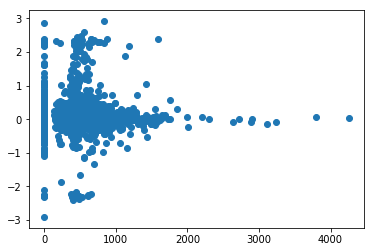

In [126]:
plt.scatter(df_merged['garagetotalsqft'],df_merged['logerror'])
plt.show()

In [114]:
## TODO the above isn't working

In [116]:
df_merged['heatingorsystemtypeid'].value_counts()

2.0     33633
7.0     14107
24.0      850
6.0       777
20.0      104
13.0       60
18.0       23
1.0        13
10.0        3
11.0        1
Name: heatingorsystemtypeid, dtype: int64

In [54]:
df_merged['heatingorsystemtypeid'].fillna(df_merged['heatingorsystemtypeid'].mode(), inplace=True)

In [55]:
df_merged['lotsizesquarefeet'].describe()

count    6.932100e+04
mean     2.997344e+04
std      1.233050e+05
min      2.360000e+02
25%      5.700000e+03
50%      7.206000e+03
75%      1.183700e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64

In [56]:
df_merged['lotsizesquarefeet'].fillna(df_merged['lotsizesquarefeet'].median(), inplace=True)

In [59]:
df_merged['poolcnt'].value_counts()

1.0    16174
Name: poolcnt, dtype: int64

In [61]:
df_merged['poolcnt'].fillna(0, inplace=True)

In [74]:
df_merged['roomcnt'].value_counts()

5.0     16753
6.0     14608
4.0     12326
7.0      9832
3.0      5772
8.0      5574
2.0      3117
9.0      2469
5.5      1879
10.0     1147
4.5       870
6.5       667
11.0      472
12.0      324
7.5       315
8.5       293
1.0       203
9.5       199
3.5       153
10.5      125
13.0      118
14.0       77
2.5        66
16.0       63
15.0       40
11.5       32
17.0       23
12.5       20
18.0       18
20.0        8
19.0        5
13.5        5
15.5        1
14.5        1
24.0        1
32.0        1
21.0        1
23.0        1
Name: roomcnt, dtype: int64

In [71]:
df_merged['roomcnt'].replace(0,np.nan, inplace=True)

There must be at least as many rooms as bedrooms plus bathrooms in the property. We are thus replacing the NaN with this sum.

In [73]:
df_merged['roomcnt'].fillna(df_merged['calculatedbathnbr'] + df_merged['bedroomcnt'], inplace=True)

In [83]:
df_merged['unitcnt'].value_counts()

1.0      47413
2.0       2031
4.0        726
3.0        529
6.0          1
45.0         1
237.0        1
42.0         1
Name: unitcnt, dtype: int64

In [84]:
df_merged['unitcnt'].fillna(df_merged['unitcnt'].mode(), inplace=True)

In [85]:
df_merged['yearbuilt'].describe()

count    77309.000000
mean      1968.611507
std         23.793171
min       1824.000000
25%       1953.000000
50%       1970.000000
75%       1987.000000
max       2016.000000
Name: yearbuilt, dtype: float64

In [86]:
df_merged['yearbuilt'].fillna(df_merged['yearbuilt'].median(), inplace=True)

In [87]:
df_merged['numberofstories'].describe()

count    17599.000000
mean         1.434286
std          0.544515
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: numberofstories, dtype: float64

In [88]:
df_merged['numberofstories'].fillna(df_merged['numberofstories'].median(), inplace=True)

In [89]:
df_merged['structuretaxvaluedollarcnt'].describe()

count    7.746400e+04
mean     1.892811e+05
std      2.304107e+05
min      4.400000e+01
25%      8.417925e+04
50%      1.364045e+05
75%      2.187340e+05
max      1.142179e+07
Name: structuretaxvaluedollarcnt, dtype: float64

In [90]:
df_merged['structuretaxvaluedollarcnt'].fillna(df_merged['structuretaxvaluedollarcnt'].median(), inplace=True)

In [91]:
df_merged['taxvaluedollarcnt'].describe()

count    7.757800e+04
mean     4.901506e+05
std      6.537979e+05
min      1.000000e+03
25%      2.068985e+05
50%      3.588785e+05
75%      5.690000e+05
max      4.906124e+07
Name: taxvaluedollarcnt, dtype: float64

In [92]:
df_merged['taxvaluedollarcnt'].fillna(df_merged['taxvaluedollarcnt'].median(), inplace=True)

In [95]:
df_merged['landtaxvaluedollarcnt'].describe()

count    7.757700e+04
mean     3.011515e+05
std      4.927249e+05
min      1.610000e+02
25%      8.529300e+04
50%      2.031880e+05
75%      3.667530e+05
max      4.895220e+07
Name: landtaxvaluedollarcnt, dtype: float64

In [96]:
df_merged['landtaxvaluedollarcnt'].fillna(df_merged['landtaxvaluedollarcnt'].median(), inplace=True)

In [97]:
df_merged['taxamount'].describe()

count     77574.000000
mean       5995.961788
std        7628.859728
min          19.920000
25%        2712.630000
50%        4448.265000
75%        6926.917500
max      586639.300000
Name: taxamount, dtype: float64

In [98]:
df_merged['taxamount'].fillna(df_merged['taxamount'].median(), inplace=True)

In [100]:
df_merged['taxdelinquencyflag'].value_counts()

Y    2900
Name: taxdelinquencyflag, dtype: int64

In [102]:
df_merged['taxdelinquencyyear'].count()

2900

The totals match, so we only need to fill the NAs with a 'N' flag

In [153]:
df_merged['taxdelinquencyflag'].fillna('N', inplace=True)

In [137]:
def convertyears(x):
    if x > 9 and x < 20:
        t = '20' + str(x)
        return float(t)
    elif x <= 9:
        t = '200' + str(x)
        return float(t)
    elif x > 20:
        t = '19' + str(x)
        return float(t)
    else:
        return np.nan
    


df_merged['taxdelinquencyyear'] = df_merged['taxdelinquencyyear'].map(lambda a: convertyears(a))

In [138]:
df_merged['taxdelinquencyyear'].value_counts()

2015.0    702
2014.0    465
2013.0    130
2012.0     66
2011.0     64
2010.0     33
2009.0     26
2008.0     11
2007.0      4
2006.0      2
Name: taxdelinquencyyear, dtype: int64

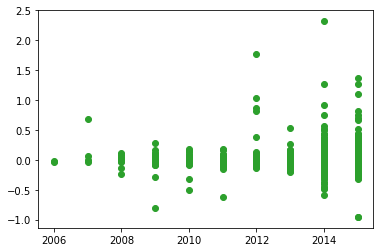

In [142]:
plt.scatter(df_merged['taxdelinquencyyear'],df_merged['logerror'])
plt.show()

In [144]:
df_merged.groupby('taxdelinquencyyear')['logerror'].describe()

,count,mean,std,min,25%,50%,75%,max
taxdelinquencyyear,,,,,,,,
2006.0,2.0,-0.029686,0.018490,-0.042760,-0.036223,-0.029686,-0.023149,-0.016612
2007.0,4.0,0.182318,0.340928,-0.033294,-0.005607,0.036412,0.224337,0.689743
2008.0,11.0,-0.012811,0.097392,-0.232950,-0.026537,-0.001936,0.036950,0.118037
2009.0,26.0,-0.011711,0.191540,-0.810303,-0.032864,0.018046,0.062981,0.279771
2010.0,33.0,-0.002965,0.121822,-0.495735,-0.019009,0.014698,0.041992,0.186409
2011.0,64.0,-0.003415,0.096843,-0.627874,-0.017519,0.004602,0.029861,0.184722
2012.0,66.0,0.083999,0.289288,-0.136237,-0.005184,0.023144,0.042569,1.772564
2013.0,130.0,0.015754,0.085692,-0.197574,-0.024885,0.011239,0.054509,0.528130
2014.0,465.0,0.017557,0.177018,-0.588179,-0.027755,0.001091,0.039190,2.322401


In [145]:
import numpy as np

In [149]:
temp = df_merged.loc[:,('taxdelinquencyyear','logerror')]

In [150]:
temp.dropna(subset=['taxdelinquencyyear'], inplace=True)

In [151]:
temp.corr()

,taxdelinquencyyear,logerror
taxdelinquencyyear,1.000000,-0.005856
logerror,-0.005856,1.000000


In [154]:
df_merged.groupby('taxdelinquencyflag')['logerror'].describe()

,count,mean,std,min,25%,50%,75%,max
taxdelinquencyflag,,,,,,,,
N,74679.0,0.016266,0.168622,-4.655420,-0.024118,0.006528,0.038624,5.262999
Y,2900.0,0.030629,0.217870,-2.327432,-0.032788,0.012049,0.059816,3.041528


Rawcensustractandblock and censustractandblock are the same according to the data dictionary. 

In [155]:
df_merged['rawcensustractandblock'].describe()

count    7.757900e+04
mean     6.049124e+07
std      2.058962e+05
min      6.037101e+07
25%      6.037311e+07
50%      6.037603e+07
75%      6.059042e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64

In [159]:
df_merged['censustractandblock'].max()

483030105084015.0

In [160]:
df_merged['censustractandblock'].min()

60371011101000.0

In [161]:
df_merged['rawcensustractandblock'].max()

61110091.002027005

In [162]:
df_merged['rawcensustractandblock'].min()

60371011.101000004

The raw value has the format FIPS + tract information with no missing values. Dropping censustractandblock, which appears to have anomolies as well as missing data.

In [163]:
df_merged.drop('censustractandblock', axis=1, inplace=True)

In [165]:
df_merged.head()

,parcelid,airconditioningtypeid,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fireplacecnt,fullbathcnt,garagecarcnt,...,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,logerror,transactiondate
0,17054981,5.0,4.0,6.533779,5.0,3760.0,6111.0,4.0,5.0,3.0,...,2.0,501928.0,872850.0,2016.0,370922.0,9673.46,N,NaN,-0.013099,2017-06-15
1,17055743,5.0,3.0,6.533779,2.0,1444.0,6111.0,0.0,2.0,1.0,...,1.0,130845.0,436157.0,2016.0,305312.0,5538.80,N,NaN,0.073985,2017-07-26
2,17068109,5.0,3.0,6.533779,1.5,1698.0,6111.0,1.0,1.0,0.0,...,1.0,193413.0,286606.0,2016.0,93193.0,2987.36,N,NaN,0.071886,2017-07-28
3,17073952,5.0,2.0,6.533779,2.0,986.0,6111.0,1.0,2.0,1.0,...,1.0,90357.0,258888.0,2016.0,168531.0,2706.24,N,NaN,0.305680,2017-06-02
4,17078502,5.0,2.0,6.533779,1.0,1170.0,6111.0,1.0,1.0,2.0,...,1.0,148752.0,592930.0,2016.0,444178.0,6220.70,N,NaN,-0.073787,2017-07-07


In [27]:
df_merged['fireplaceflag'].value_counts()

0    69325
1     8289
Name: fireplaceflag, dtype: int64

In [20]:
df_merged['fireplaceflag'].describe()

count     8461
unique       1
top          1
freq      8461
Name: fireplaceflag, dtype: int64

In [14]:
df_merged['fireplacecnt'].value_counts()

1.0    7018
2.0     998
3.0     235
4.0      35
5.0       3
Name: fireplacecnt, dtype: int64

In [29]:
df_merged.loc[df_merged['fireplacecnt'] > 0, 'fireplaceflag'] = True

In [28]:
df_merged['fireplaceflag'] = False

In [44]:
#df_merged['garagetotalsqft'].fillna((df_merged['garagetotalsqft'].median if df_merged['garagecarcnt'] > 0 else 0), inplace=True)
df_merged[df_merged['garagecarcnt'] > 0, 'garagetotalsqft']
df_merged.loc[df_merged['garagecarcnt'] > 0, 'garagetotalsqft'].fillna(df_merged['garagetotalsqft'].median(), inplace=True)


In [46]:
df_merged.groupby('garagecarcnt')['garagetotalsqft'].describe()

,count,mean,std,min,25%,50%,75%,max
garagecarcnt,,,,,,,,
0.0,230.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1.0,5691.0,123.950097,166.372195,0.0,0.00,0.0,350.00,399.0
2.0,18638.0,396.108112,215.264847,0.0,402.00,454.0,506.00,719.0
3.0,632.0,756.787975,130.339552,0.0,734.00,762.0,814.00,878.0
4.0,256.0,976.546875,135.048248,0.0,912.00,968.0,1048.00,1196.0
5.0,45.0,1328.644444,98.059156,1200.0,1245.00,1291.0,1419.00,1514.0
6.0,14.0,1512.428571,442.265621,0.0,1548.75,1598.5,1671.75,1762.0
7.0,4.0,1466.500000,980.465366,0.0,1388.25,1925.5,2003.75,2015.0
8.0,2.0,2247.000000,69.296465,2198.0,2222.50,2247.0,2271.50,2296.0


In [40]:
#df_merged['censustract']=np.nan
#df_merged['censusbloc']=np.nan

def block(a):
    a = int(round(a*1000000))
    b = str(a)
    return b[10:]

def tract(a):
    b = str(a)
    return b[4:11]

a = 61110022.003006995
tract(a)
b = 60371371.031000003
tract(b)

def tractblock(a):
    a = int(round(a*1000000))
    b = str(a)
    return b[4:]

c = 61110022.003006995
tractblock(c)

'0022003007'

In [26]:
a = df_merged['rawcensustractandblock'].mode()
a[0]

60371371.031000003

In [34]:
b = df_merged['censustractandblock'].mode()
float(b)

60371371031000.0

In [27]:
int(round(a[0]*1000000))

60371371031000

In [29]:
int(round(df_merged['rawcensustractandblock'][1500]*1000000))

60591103013004

In [44]:
df_merged['tract'] = df_merged['rawcensustractandblock'].map(lambda a: tract(a))

In [48]:
df_merged['tract'].describe()

count       77613
unique       2993
top       0524.20
freq          207
Name: tract, dtype: object

In [51]:
df_merged['rawcensustractandblock'].fillna(0,inplace=True)
df_merged['block'] = df_merged['rawcensustractandblock'].map(lambda a: block(a))

In [52]:
df_merged['block'].describe()

count     77613
unique      657
top        1000
freq       2739
Name: block, dtype: object

In [54]:
df_merged['tractblock'] = df_merged['rawcensustractandblock'].map(lambda a: tractblock(a))

In [55]:
df_merged['tractblock'].describe()

count          77613
unique         39145
top       1371031000
freq              60
Name: tractblock, dtype: object

In [60]:
def full(a):
    a = int(round(a * 1000000))
    return str(a)

df_merged['rawcensustractandblock'] = df_merged['rawcensustractandblock'].map(lambda a: full(a))

In [61]:
df_merged['rawcensustractandblock'].describe()

count                    77613
unique                   39189
top       60590626102134000000
freq                        60
Name: rawcensustractandblock, dtype: object

In [70]:
df_merged['garagetotalsqft'].replace(0,np.nan, inplace=True)
a = df_merged['garagetotalsqft'].median()
df_merged.loc[df_merged['garagecarcnt']>0,'garagetotalsqft'].fillna(a, inplace=True)
df_merged['garagetotalsqft'].fillna(0, inplace=True)


df_merged.groupby('garagecarcnt')['garagetotalsqft'].describe()

,count,mean,std,min,25%,50%,75%,max
garagecarcnt,,,,,,,,
0.0,230.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1.0,5691.0,123.950097,166.372195,0.0,0.00,0.0,350.00,399.0
2.0,18638.0,396.108112,215.264847,0.0,402.00,454.0,506.00,719.0
3.0,632.0,756.787975,130.339552,0.0,734.00,762.0,814.00,878.0
4.0,256.0,976.546875,135.048248,0.0,912.00,968.0,1048.00,1196.0
5.0,45.0,1328.644444,98.059156,1200.0,1245.00,1291.0,1419.00,1514.0
6.0,14.0,1512.428571,442.265621,0.0,1548.75,1598.5,1671.75,1762.0
7.0,4.0,1466.500000,980.465366,0.0,1388.25,1925.5,2003.75,2015.0
8.0,2.0,2247.000000,69.296465,2198.0,2222.50,2247.0,2271.50,2296.0


In [73]:
df_merged['poolcnt'].fillna(0, inplace=True)
df_merged['hashottuborspa'].fillna(False, inplace=True)

def pooltypes(a, b):
    if a and b > 0:
        return 2
    elif not(a) and b > 0:
        return 7
    elif a and b == 0:
        return 10
    else:
        return 0

df_merged['pooltype2'] = df_merged.apply(lambda x: pooltypes(x['hashottuborspa'], x['poolcnt']), axis=1)

In [75]:
df_merged['pooltype2'].value_counts()

0     60974
7     15100
2      1074
10      465
Name: pooltype2, dtype: int64

In [77]:
a = df_merged['propertyzoningdesc'].value_counts()

In [83]:
b = a[a < 2]

In [84]:
b.describe()

count    544.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: propertyzoningdesc, dtype: float64

In [86]:
df_merged['propertycountylandusecode'].value_counts()

0100    26782
122     13067
010C     8838
0101     6413
34       4932
1111     3362
1        2399
010E     2053
010D     1946
0200     1847
1129     1380
1110     1025
0400      622
0300      485
012C      385
0104      369
1128      335
01DC      212
01HC      137
38         94
010G       94
96         91
0103       91
010H       64
0108       57
1117       56
010M       53
0700       50
010V       44
1210       42
        ...  
012E        5
0141        4
0401        4
1120        3
1333        3
0102        3
0105        3
0111        2
1321        2
0130        2
0301        2
1722        2
1421        2
040V        2
1432        1
0131        1
0204        1
020E        1
020G        1
040B        1
012D        1
030G        1
040G        1
010L        1
0115        1
0133        1
0114        1
105         1
020M        1
0203        1
Name: propertycountylandusecode, Length: 75, dtype: int64

In [87]:
df_merged['propertylandusetypeid'].value_counts()

261.0    52441
266.0    19342
246.0     2021
269.0     1947
248.0      729
247.0      539
265.0      335
263.0       74
275.0       59
260.0       42
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

In [106]:

df_merged = df_merged.dropna(subset=['latitude'])
df_merged = df_merged.dropna(subset=['longitude'])

df_merged['latitude'] = df_merged['latitude'] / 1000000
df_merged['longitude'] = df_merged['longitude'] / 1000000

In [107]:
from uszipcode import ZipcodeSearchEngine

search = ZipcodeSearchEngine()
def zip(a, b):
    c = search.by_coordinate(a,b)
    return c[0].Zipcode
#    print(c)
    #print(str(a) + ", " + str(b))

df_merged['zip2'] = df_merged.apply(lambda x: zip(x['latitude'], x['longitude']), axis=1)
#df_merged.apply(lambda x: zip(x['latitude'], x['longitude']), axis=1)

#a = df_merged.head()
#a

In [108]:
df_merged['zip2'].value_counts()

93534    1424
93552     876
93551     794
92688     754
92677     722
91350     718
92694     631
93063     587
92637     551
92630     531
91767     515
91362     507
90732     488
92620     484
92646     475
91340     468
93012     468
91360     459
92807     452
92692     450
93065     443
91351     442
92629     437
92870     436
90069     436
90631     431
91354     422
91367     409
90278     406
92656     405
         ... 
93033      46
92675      44
91786      44
90822      40
90401      38
90014      32
91390      30
91501      29
91201      29
93066      27
91207      26
90012      26
92823      25
90040      24
91750      23
91204      23
90017      23
91024      20
93535      17
90021      17
92676      13
91384      13
93544       8
93013       5
93553       2
92397       2
93243       2
93560       2
91042       1
93563       1
Name: zip2, Length: 390, dtype: int64

In [105]:
b['latitude']

34449407.0

In [109]:
clean = pd.read_csv('clean_data.csv', low_memory=False)
clean.head()

,Unnamed: 0,parcelid,airconditioningtypeid,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fireplacecnt,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,logerror,transactiondate,setyear,pooltype,zipcode
0,0,17073783,5.0,3.0,6.013597,2.5,1264.0,6111.0,0.0,2.0,...,2015.0,76724.0,2015.06,N,NaN,0.0953,2016-01-27,2016,0,93001
1,1,17088994,5.0,2.0,6.013597,1.0,777.0,6111.0,0.0,1.0,...,2015.0,95870.0,2581.30,N,NaN,0.0198,2016-03-30,2016,0,93004
2,2,17088994,5.0,2.0,6.013597,1.0,777.0,6111.0,0.0,1.0,...,2015.0,95870.0,2581.30,N,NaN,0.0198,2016-03-30,2016,0,93004
3,3,17088994,5.0,2.0,6.013597,1.0,777.0,6111.0,0.0,1.0,...,2015.0,95870.0,2581.30,N,NaN,0.0198,2016-03-30,2016,0,93004
4,4,17088994,5.0,2.0,6.013597,1.0,777.0,6111.0,0.0,1.0,...,2015.0,95870.0,2581.30,N,NaN,0.0198,2016-03-30,2016,0,93004


In [110]:
clean.count()

Unnamed: 0                      205782
parcelid                        205782
airconditioningtypeid           205782
bedroomcnt                      205782
buildingqualitytypeid           205782
calculatedbathnbr               205782
calculatedfinishedsquarefeet    205782
fips                            205782
fireplacecnt                    205782
fullbathcnt                     205782
garagecarcnt                    205782
garagetotalsqft                 205782
hashottuborspa                  205782
heatingorsystemtypeid           130547
latitude                        205782
longitude                       205782
lotsizesquarefeet               205782
poolcnt                         205782
pooltypeid10                      1815
pooltypeid2                       2677
pooltypeid7                      38105
propertycountylandusecode       205781
propertylandusetypeid           205782
propertyzoningdesc              134841
rawcensustractandblock          205782
regionidcity             

In [127]:
import datetime

#df_merged['taxdelinquencyyear'].fillna(df_merged.loc['setyear'],inplace=True)
#df_merged['setyear']='2017'

format = '%Y'
df_merged['taxdelinquencyyear'] = pd.to_datetime(df_merged.loc[:,'taxdelinquencyyear'])
df_merged['setyear'] = pd.to_datetime(df_merged.loc[:,'setyear'])







In [129]:
df_merged['taxdelinquencyyear'].describe()

count                              2900
unique                               13
top       1970-01-01 00:00:00.000000015
freq                               1560
first     1970-01-01 00:00:00.000000003
last      1970-01-01 00:00:00.000000099
Name: taxdelinquencyyear, dtype: object

In [133]:
df_merged['setyear']=2017

In [152]:
def calcyr(t, s):
    if np.isnan(t):
        return 0
    else:
        return s - t

df_merged['taxdelinquencyage'] = df_merged.apply(lambda x: calcyr(x['taxdelinquencyyear'], x['setyear']), axis=1)

In [153]:
df_merged['taxdelinquencyage'].value_counts()

0.0     74713
2.0      1560
3.0       801
4.0       187
5.0       113
6.0        98
7.0        66
8.0        47
9.0        14
10.0       10
13.0        1
11.0        1
14.0        1
18.0        1
Name: taxdelinquencyage, dtype: int64

In [151]:
def convertyears(x):
    if x > 9 and x < 20:
        t = '20' + str(x)
        return float(t)
    elif x <= 9:
        t = '200' + str(x)
        return float(t)
    elif x > 20:
        t = '19' + str(x)
        return float(t)
    else:
        return np.nan

df_merged['taxdelinquencyyear'] = df_merged['taxdelinquencyyear'].map(lambda a: convertyears(a))



In [139]:
def calcyr(t, s):
    if np.isnan(t):
        return 0
    else:
        return s - t
    
calcyr(a['taxdelinquencyyear'],a['setyear'])

0

In [157]:
columns = ['taxdelinquencyage','logerror']
df_merged[columns].corr()

,taxdelinquencyage,logerror
taxdelinquencyage,1.000000,0.078384
logerror,0.078384,1.000000


In [155]:
columns = ['taxdelinquencyyear','logerror']
df_merged[columns].corr()

,taxdelinquencyyear,logerror
taxdelinquencyyear,1.000000,-0.078384
logerror,-0.078384,1.000000


In [156]:
df_merged['taxdelinquencyage'].replace(0, np.nan, inplace=True)

In [161]:
#columns = ['taxdelinquencyflag','logerror']
#df_merged[columns].corr()
df_merged['taxdelinquencyflag'].fillna('N', inplace=True)
df_merged.groupby('taxdelinquencyflag')['logerror'].describe()

,count,mean,std,min,25%,50%,75%,max
taxdelinquencyflag,,,,,,,,
N,74713.0,0.016216,0.168779,-4.655420,-0.024144,0.006516,0.038626,5.262999
Y,2900.0,0.030629,0.217870,-2.327432,-0.032788,0.012049,0.059816,3.041528


In [162]:
clean = pd.read_csv('clean_data.csv', low_memory=False)
clean.head()

,Unnamed: 0,parcelid,airconditioningtypeid,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fireplacecnt,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,logerror,transactiondate,setyear,pooltype,zipcode
0,0,17073783,5.0,3.0,6.013597,2.5,1264.0,6111.0,0.0,2.0,...,2015.0,76724.0,2015.06,N,NaN,0.0953,2016-01-27,2016,0,93001
1,1,17088994,5.0,2.0,6.013597,1.0,777.0,6111.0,0.0,1.0,...,2015.0,95870.0,2581.30,N,NaN,0.0198,2016-03-30,2016,0,93004
2,2,17088994,5.0,2.0,6.013597,1.0,777.0,6111.0,0.0,1.0,...,2015.0,95870.0,2581.30,N,NaN,0.0198,2016-03-30,2016,0,93004
3,3,17088994,5.0,2.0,6.013597,1.0,777.0,6111.0,0.0,1.0,...,2015.0,95870.0,2581.30,N,NaN,0.0198,2016-03-30,2016,0,93004
4,4,17088994,5.0,2.0,6.013597,1.0,777.0,6111.0,0.0,1.0,...,2015.0,95870.0,2581.30,N,NaN,0.0198,2016-03-30,2016,0,93004


In [163]:
clean.count()

Unnamed: 0                      205782
parcelid                        205782
airconditioningtypeid           205782
bedroomcnt                      205782
buildingqualitytypeid           205782
calculatedbathnbr               205782
calculatedfinishedsquarefeet    205782
fips                            205782
fireplacecnt                    205782
fullbathcnt                     205782
garagecarcnt                    205782
garagetotalsqft                 205782
hashottuborspa                  205782
heatingorsystemtypeid           130547
latitude                        205782
longitude                       205782
lotsizesquarefeet               205782
poolcnt                         205782
pooltypeid10                      1815
pooltypeid2                       2677
pooltypeid7                      38105
propertycountylandusecode       205781
propertylandusetypeid           205782
propertyzoningdesc              134841
rawcensustractandblock          205782
regionidcity             

In [166]:
clean['heatingorsystemtypeid'].fillna(clean['heatingorsystemtypeid'].mode(), inplace=True)

In [167]:
clean.count()

Unnamed: 0                      205782
parcelid                        205782
airconditioningtypeid           205782
bedroomcnt                      205782
buildingqualitytypeid           205782
calculatedbathnbr               205782
calculatedfinishedsquarefeet    205782
fips                            205782
fireplacecnt                    205782
fullbathcnt                     205782
garagecarcnt                    205782
garagetotalsqft                 205782
hashottuborspa                  205782
heatingorsystemtypeid           130547
latitude                        205782
longitude                       205782
lotsizesquarefeet               205782
poolcnt                         205782
pooltypeid10                      1815
pooltypeid2                       2677
pooltypeid7                      38105
propertycountylandusecode       205781
propertylandusetypeid           205782
propertyzoningdesc              134841
rawcensustractandblock          205782
regionidcity             

In [172]:
clean['unitcnt'].mode()

0    1.0
dtype: float64

In [176]:
clean.groupby('regionidneighborhood')['rawcensustractandblock'].value_counts()

regionidneighborhood  rawcensustractandblock
6952.0                60379200452005            31
                      60379200321019            21
                      60379200203056            20
                      60379200151025            18
                      60379200201010            18
                      60379200172005            17
                      60379200161004            16
                      60379200183005            16
                      60379201122009            16
                      60379200171000            14
                      60379200172009            14
                      60379200133000            13
                      60379200442007            12
                      60379200132002            11
                      60379200201004            11
                      60379200451007            11
                      60379200131003            10
                      60379200201007            10
                      60379201121002 

In [177]:
def lot(a):
    if (a == 3589145 or a == 6971010):
        return clean['lotsizesquarefeet'].median()
    else:
        return a
clean['lotsizesquarefeet'] = clean['lotsizesquarefeet'].map(lambda a: lot(a))

In [178]:
clean['lotsizesquarefeet'].max()

2831752.0

In [183]:
a = clean[clean['calculatedfinishedsquarefeet'] < 100]
b = a[a['fullbathcnt']==20]

In [186]:
a.describe()

,Unnamed: 0,parcelid,airconditioningtypeid,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fireplacecnt,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,logerror,setyear,pooltype,zipcode
count,3.00000,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.000000,...,3.000000,3.000000,3.0,3.000000,3.000000,0.0,3.000000,3.0,3.0,3.000000
mean,88253.00000,1.167036e+07,3.666667,1.000000,5.671199,8.333333,36.000000,6037.0,0.0,8.333333,...,114618.000000,190803.666667,2015.0,76185.666667,2353.126667,NaN,0.851833,2016.0,0.0,90584.333333
std,25502.26933,9.261639e+05,2.309401,1.732051,1.529028,10.115994,32.186954,0.0,0.0,10.115994,...,99405.300578,172424.138323,0.0,79409.780924,2091.300657,NaN,1.465958,0.0,0.0,715.206497
min,59324.00000,1.082595e+07,1.000000,0.000000,4.000000,2.000000,2.000000,6037.0,0.0,2.000000,...,104.000000,1044.000000,2015.0,940.000000,64.000000,NaN,-0.032500,2016.0,0.0,90094.000000
25%,78638.50000,1.117509e+07,3.000000,0.000000,5.006798,2.500000,21.000000,6037.0,0.0,2.500000,...,82586.500000,117270.000000,2015.0,34683.500000,1447.880000,NaN,0.005750,2016.0,0.0,90174.000000
50%,97953.00000,1.152424e+07,5.000000,0.000000,6.013597,3.000000,40.000000,6037.0,0.0,3.000000,...,165069.000000,233496.000000,2015.0,68427.000000,2831.760000,NaN,0.044000,2016.0,0.0,90254.000000
75%,102717.50000,1.209257e+07,5.000000,1.500000,6.506798,11.500000,53.000000,6037.0,0.0,11.500000,...,171875.000000,285683.500000,2015.0,113808.500000,3497.690000,NaN,1.294000,2016.0,0.0,90829.500000
max,107482.00000,1.266091e+07,5.000000,3.000000,7.000000,20.000000,66.000000,6037.0,0.0,20.000000,...,178681.000000,337871.000000,2015.0,159190.000000,4163.620000,NaN,2.544000,2016.0,0.0,91405.000000
